<a href="https://colab.research.google.com/github/01yes/churn_predict/blob/main/churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Reasoning**:
Load the data into a pandas DataFrame.



**Reasoning**:
Explore the data shape, structure, and descriptive statistics to understand the dataset's basic characteristics.



In [2]:
from google.colab import files
uploaded = files.upload()

Saving customer.csv to customer (1).csv
Saving utilization.csv to utilization.csv
Saving expansion_outcome.csv to expansion_outcome.csv
Saving customer_feedback.csv to customer_feedback (1).csv
Saving product.xlsx to product (1).xlsx


In [3]:
import pandas as pd

df = pd.read_csv("customer.csv")

df["score_date"] = pd.to_datetime(df["score_date"], format="%d-%m-%Y", errors="coerce")

def clean_binary_columns(df, columns):
    for col in columns:
        df[col] = df[col].apply(lambda x: 1 if x == 1 else 0)
    return df

binary_cols = [
    "segment_smb", "segment_non_smb", "segment_commercial", "segment_enterprise", "segment_midmarket",
    "region_emea", "region_apac", "region_latam", "region_amer",
    "sales_assisted", "legacy_flag", "billing_dunning_not_ok", "crm_success_owner_change"
]
df = clean_binary_columns(df, binary_cols)


df = df[(df["customer_age_quarters"] >= 1) & (df["customer_age_quarters"] <= 80)]

df["crm_industry_current"] = df["crm_industry_current"].fillna("Unknown")


valid_employee_ranges = [
    "1 - 9", "10 - 49", "50 - 99", "100 - 249", "250 - 499",
    "500 - 999", "1000 - 4999", "5000+"
]

if 'crm_employee_range' in df.columns:
    df['crm_employee_range'] = df['crm_employee_range'].astype(str).str.strip()

    df['crm_employee_range'] = df['crm_employee_range'].apply(
        lambda x: "Unknown" if any(month in x for month in
                                   ["Jan", "Feb", "Mar", "Apr", "May", "Jun",
                                    "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]) else x
    )

    df['crm_employee_range'] = df['crm_employee_range'].apply(
        lambda x: x if x in valid_employee_ranges else "Unknown"
    )

    df['crm_employee_range'] = df['crm_employee_range'].astype('category')

df.to_csv("customer_cleaned.csv", index=False)

print("Data cleaning completed. Cleaned file saved as 'customer_cleaned.csv'.")

Data cleaning completed. Cleaned file saved as 'customer_cleaned.csv'.


In [4]:
df=pd.read_csv("customer_cleaned.csv")

In [5]:
df.nunique()

,0
id,1049
score_date,13
segment_smb,2
segment_non_smb,2
segment_commercial,2
segment_enterprise,2
segment_midmarket,2
region_emea,2
region_apac,2
region_latam,2


In [6]:
df.head(30)

,id,score_date,segment_smb,segment_non_smb,segment_commercial,segment_enterprise,segment_midmarket,region_emea,region_apac,region_latam,region_amer,customer_age_quarters,sales_assisted,legacy_flag,product_counts,billing_dunning_not_ok,crm_industry_current,crm_employee_range,crm_success_owner_change
0,JMAN_2429072,2023-02-10,1,0,0,0,0,1,0,0,0,13,1,0,2,0,"Retail, Wholesale & Distribution",100 - 249,0
1,JMAN_9043466,2023-01-13,0,1,1,0,0,1,0,0,0,16,1,0,4,0,"Retail, Wholesale & Distribution",250 - 499,0
2,JMAN_2452556,2023-02-24,0,1,0,0,0,1,0,0,0,17,0,0,5,0,Unknown,Unknown,0
3,JMAN_2455113,2023-03-03,0,1,0,0,0,1,0,0,0,17,0,0,3,0,Unknown,Unknown,0
4,JMAN_18127937,2023-02-10,0,1,0,0,0,1,0,0,0,17,0,0,1,0,Unknown,Unknown,0
5,JMAN_2373631,2023-03-03,0,1,0,0,0,0,0,0,1,17,0,0,4,0,Corporate Services,Unknown,0
6,JMAN_2447279,2023-03-03,1,0,0,0,0,0,0,0,1,17,0,0,2,0,"Retail, Wholesale & Distribution",50 - 99,0
7,JMAN_9004478,2023-01-20,1,0,0,0,0,0,1,0,0,17,1,0,4,0,"Retail, Wholesale & Distribution",50 - 99,0
8,JMAN_2477864,2023-03-24,1,0,0,0,0,0,1,0,0,17,0,0,2,0,"Retail, Wholesale & Distribution",50 - 99,0
9,JMAN_2445629,2023-01-20,0,1,0,0,0,0,0,0,1,16,1,0,1,0,Technology,Unknown,0


<Axes: xlabel='crm_industry_current'>

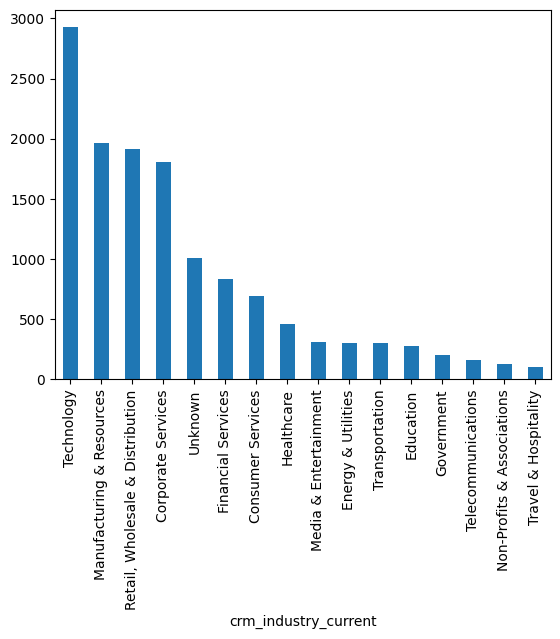

In [7]:
df["crm_industry_current"].value_counts().plot(kind='bar')

In [8]:
df.isnull().sum()

,0
id,0
score_date,0
segment_smb,0
segment_non_smb,0
segment_commercial,0
segment_enterprise,0
segment_midmarket,0
region_emea,0
region_apac,0
region_latam,0


In [15]:
import pandas as pd

df = pd.read_excel("product.xlsx")
print(df.head())

              id           score_date  discount_arr_usd  team_plus  pro_plus  \
0   JMAN_2429072  2023-10-02 00:00:00               0.0          1         1   
1   JMAN_9043466           13-01-2023               0.0          1         1   
2   JMAN_2452556           24-02-2023               0.0          1         1   
3   JMAN_2455113  2023-03-03 00:00:00               0.0          1         0   
4  JMAN_18127937  2023-10-02 00:00:00               0.0          1         1   

   ent_plus  discount_arr_usd_percentage  product_counts_percentage  \
0         0                          100                        100   
1         1                          100                        100   
2         1                          100                        100   
3         0                          100                        100   
4         0                          100                        100   

   total_pool_max_agents  
0                      0  
1                      0  
2          

In [16]:
missing_values = df.isnull().sum()

# Handle missing values column-wise (if any)
for col in df.columns:
    if df[col].isnull().sum() > 0:
        if df[col].dtype == 'object':  # Categorical columns
            df[col].fillna(df[col].mode()[0], inplace=True)
        else:  # Numerical columns
            df[col].fillna(df[col].median(), inplace=True)  # Using median for robust imputation

# Convert integer-based categorical columns to proper data types
int_columns = ["team_plus", "pro_plus", "ent_plus", "discount_arr_usd_percentage", "product_counts_percentage", "total_pool_max_agents"]
df[int_columns] = df[int_columns].astype('int')

df["score_date"] = pd.to_datetime(df["score_date"], format="%d-%m-%Y", errors="coerce")
# Save cleaned dataset
df.to_csv("cleaned_product.csv", index=False)

# Display summary
print("Dataset cleaned and saved as 'cleaned_product.csv'")
print(df.info())

Dataset cleaned and saved as 'cleaned_product.csv'
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13417 entries, 0 to 13416
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   id                           13417 non-null  object        
 1   score_date                   13417 non-null  datetime64[ns]
 2   discount_arr_usd             13417 non-null  float64       
 3   team_plus                    13417 non-null  int64         
 4   pro_plus                     13417 non-null  int64         
 5   ent_plus                     13417 non-null  int64         
 6   discount_arr_usd_percentage  13417 non-null  int64         
 7   product_counts_percentage    13417 non-null  int64         
 8   total_pool_max_agents        13417 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(6), object(1)
memory usage: 943.5+ KB
None


In [17]:
import pandas as pd

# Load the dataset
file_path = "utilization.csv"
df = pd.read_csv(file_path)
# Convert score_date to datetime format
df['score_date'] = pd.to_datetime(df['score_date'], format="%d-%m-%Y")
# Fill missing values
df['max_seats'].fillna(df['max_seats'].median(), inplace=True)
df['max_seats_M_before'].fillna(df['max_seats_M_before'].median(), inplace=True)
df['is_provisioned_any_channel_M_before'].fillna(df['is_provisioned_any_channel_M_before'].median(), inplace=True)
# Remove duplicates
df.drop_duplicates(inplace=True)

# Save the cleaned dataset
cleaned_file_path = "cleaned_utilization.csv"
df.to_csv(cleaned_file_path, index=False)

print("Cleaning complete. Cleaned file saved as:", cleaned_file_path)
df = pd.read_csv("cleaned_utilization.csv")
print(df.isnull().sum())


Cleaning complete. Cleaned file saved as: cleaned_utilization.csv
id                                     0
score_date                             0
max_seats                              0
agent_utilization                      0
is_provisioned_any_channel_M_before    0
max_seats_M_before                     0
agent_utilization_increase             0
agent_utilization_decrease             0
seat_utilization                       0
seat_utilization_M_before              0
seat_utilization_increase              0
seat_utilization_decrease              0
dtype: int64


<ipython-input-17-a6059b179787>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['max_seats'].fillna(df['max_seats'].median(), inplace=True)
<ipython-input-17-a6059b179787>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=T

In [18]:
import pandas as pd


df = pd.read_csv('expansion_outcome.csv')

print("Before Cleaning:")
print(df.info())
print(df.head())


df.fillna(df.median(numeric_only=True), inplace=True)


df.fillna({col: "Unknown" for col in df.select_dtypes(include=['object']).columns}, inplace=True)

df.drop_duplicates(inplace=True)


df["score_date"] = pd.to_datetime(df["score_date"], format="%d-%m-%Y", errors="coerce")


df.to_csv('expansion_outcome_cleaned.csv', index=False)

print("Data cleaning complete. Cleaned file saved as 'expansion_outcome_cleaned.csv'.")

Before Cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13417 entries, 0 to 13416
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  13417 non-null  object 
 1   score_date          13417 non-null  object 
 2   current_arr         13417 non-null  float64
 3   future_arr          12392 non-null  float64
 4   arr_change          13417 non-null  float64
 5   fx_impact           13417 non-null  float64
 6   seat_change_arr     13417 non-null  float64
 7   product_change_arr  13417 non-null  float64
dtypes: float64(6), object(2)
memory usage: 838.7+ KB
None
              id  score_date  current_arr  future_arr  arr_change  fx_impact  \
0   JMAN_2429072  10-02-2023      2976.00     2976.00        0.00       0.00   
1   JMAN_9043466  13-01-2023     20724.72    21474.84      499.56     250.56   
2   JMAN_2452556  24-02-2023       605.76      817.80      181.92      30.12   
3   JM

In [20]:
import pandas as pd

customer_feedback = pd.read_csv('customer_feedback.csv')

print(len(customer_feedback))

x=[]
for i in customer_feedback['id']:
    if i not in x:
        x.append(i)

print(len(x))

13417
1053


In [21]:
a=(customer_feedback['num_high_sev_outages']==customer_feedback['has_high_sev_outage'])
print(len(a))

customer_feedback=customer_feedback.drop('has_high_sev_outage',axis=1)
print(customer_feedback.columns)

13417
Index(['id', 'score_date', 'csat_score', 'csat_response_rate', 'nps_score',
       'nps_score_all_time', 'avg_nps_rating', 'avg_nps_rating_all_time',
       'outreach_call_90dayflag', 'num_low_sev_outages',
       'num_high_sev_outages', 'months_since_high_sev_outage',
       'num_tickets_deflected', 'max_tickets_per_agent'],
      dtype='object')


In [23]:
customer_feedback.to_csv('customer_feedback1.csv',index=False)

In [24]:
customer_feedback['nps_score'].fillna(0, inplace=True)
customer_feedback['nps_score_all_time'].fillna(0, inplace=True)
customer_feedback['avg_nps_rating'].fillna(0, inplace=True)
customer_feedback['avg_nps_rating_all_time'].fillna(0, inplace=True)

<ipython-input-24-31909463f1d5>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  customer_feedback['nps_score'].fillna(0, inplace=True)
<ipython-input-24-31909463f1d5>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

In [25]:
for i in customer_feedback.columns:
    print(i)
    print(customer_feedback[i].isnull().sum())

id
0
score_date
0
csat_score
0
csat_response_rate
0
nps_score
0
nps_score_all_time
0
avg_nps_rating
0
avg_nps_rating_all_time
0
outreach_call_90dayflag
0
num_low_sev_outages
0
num_high_sev_outages
0
months_since_high_sev_outage
2190
num_tickets_deflected
0
max_tickets_per_agent
0


In [26]:
customer_feedback['months_since_high_sev_outage'].fillna(0, inplace=True)

customer_feedback["score_date"] = pd.to_datetime(customer_feedback["score_date"], format="%d-%m-%Y", errors="coerce")

<ipython-input-26-13a18a3448f6>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  customer_feedback['months_since_high_sev_outage'].fillna(0, inplace=True)


In [27]:
print(customer_feedback['months_since_high_sev_outage'].isnull().sum())

customer_feedback.to_csv('cleaned customer_feedback.csv',index=False)

0


In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
customer_feedback = pd.read_csv("cleaned customer_feedback.csv")
customer = pd.read_csv("customer_cleaned.csv")
expansion_outcome = pd.read_csv("expansion_outcome_cleaned.csv")
product = pd.read_csv("cleaned_product.csv")
utilization = pd.read_csv("cleaned_utilization.csv")
merged_data = (
    customer
    .merge(customer_feedback, on=["id", "score_date"], how="left")
    .merge(expansion_outcome, on=["id", "score_date"], how="left")
    .merge(product, on=["id", "score_date"], how="left")
    .merge(utilization, on=["id", "score_date"], how="left")
)
merged_data.to_csv("merged_data.csv", index=False)
df=pd.read_csv("merged_data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13389 entries, 0 to 13388
Data columns (total 54 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   13389 non-null  object 
 1   score_date                           13389 non-null  object 
 2   segment_smb                          13389 non-null  int64  
 3   segment_non_smb                      13389 non-null  int64  
 4   segment_commercial                   13389 non-null  int64  
 5   segment_enterprise                   13389 non-null  int64  
 6   segment_midmarket                    13389 non-null  int64  
 7   region_emea                          13389 non-null  int64  
 8   region_apac                          13389 non-null  int64  
 9   region_latam                         13389 non-null  int64  
 10  region_amer                          13389 non-null  int64  
 11  customer_age_quarters       

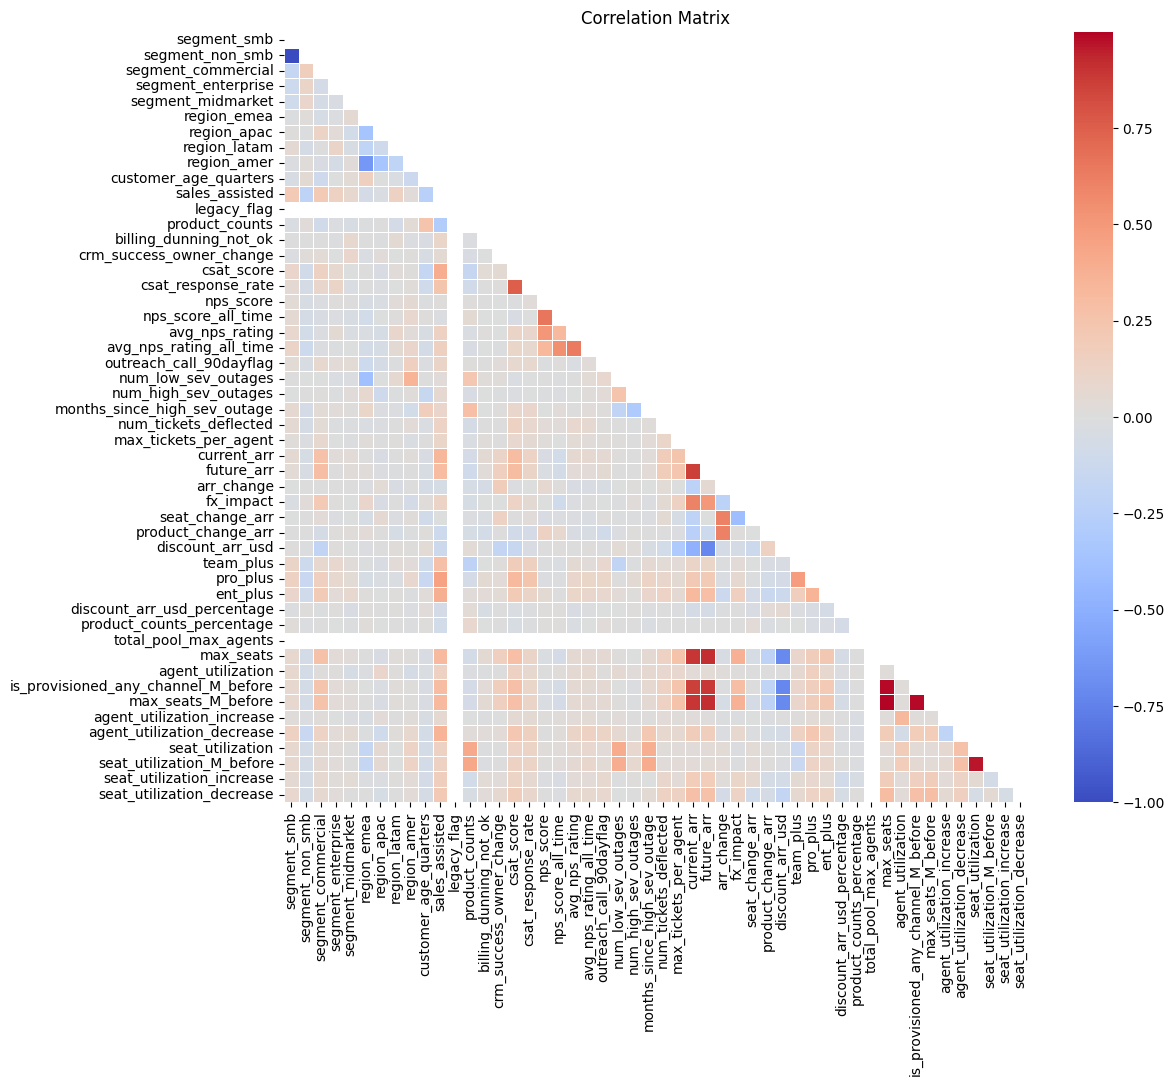

In [44]:


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("merged_data.csv")


numerical_cols = df.select_dtypes(include=['number']).columns

correlation_matrix = df[numerical_cols].corr()


mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))


plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', mask=mask, fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()


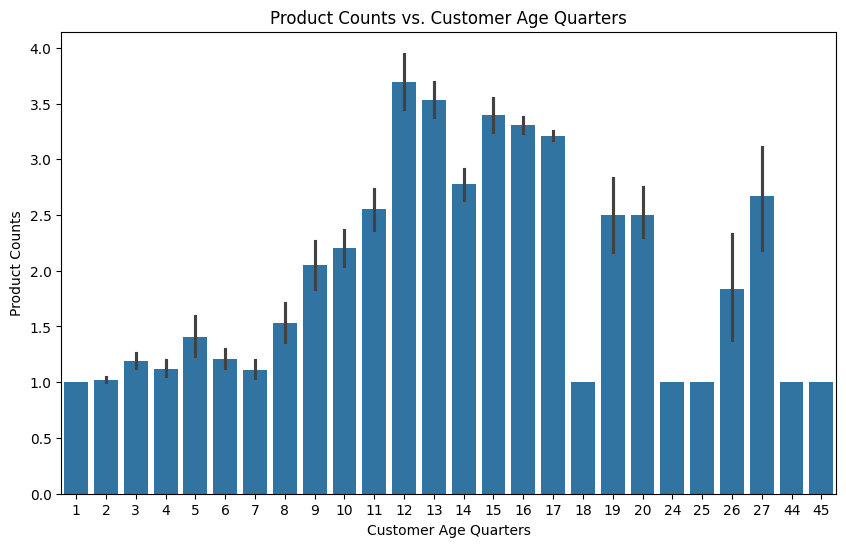

In [59]:


import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("merged_data.csv")


plt.figure(figsize=(10, 6))
sns.barplot(x='customer_age_quarters', y='product_counts', data=df, estimator=sum)
plt.title('Relationship between Customer Age Quarters and Product Counts')
plt.xlabel('Customer Age Quarters')
plt.ylabel('Total Product Counts')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [61]:

df = pd.read_csv("merged_data.csv")


def categorize_sales(row):
    plus_columns = ["team_plus", "pro_plus", "ent_plus"]
    plus_sum = sum(row[col] for col in plus_columns)
    if plus_sum >= 2:
        return "Positive"
    elif plus_sum == 1:
        return "Neutral"
    else:
        return "Negative"

df["categories_sale"] = df.apply(categorize_sales, axis=1)


df.to_csv("merged_with_categories.csv", index=False)


In [63]:


import pandas as pd


df = pd.read_csv("merged_with_categories.csv")


product_counts_by_category = df.groupby('categories_sale')['product_counts'].sum()
product_counts_by_category




              id  score_date  segment_smb  segment_non_smb  \
0   JMAN_2429072  2023-02-10            1                0   
1   JMAN_9043466  2023-01-13            0                1   
2   JMAN_2452556  2023-02-24            0                1   
3   JMAN_2455113  2023-03-03            0                1   
4  JMAN_18127937  2023-02-10            0                1   

   segment_commercial  segment_enterprise  segment_midmarket  region_emea  \
0                   0                   0                  0            1   
1                   1                   0                  0            1   
2                   0                   0                  0            1   
3                   0                   0                  0            1   
4                   0                   0                  0            1   

   region_apac  region_latam  ...  seat_utilization_M_before  \
0            0             0  ...                        1.0   
1            0             0  ...   

In [65]:

df = pd.read_csv("merged_with_categories.csv")


df['age_sales_interaction'] = df['customer_age_quarters'] * df['categories_sale'].map({'Positive': 1, 'Neutral': 0, 'Negative': -1})


df['combined_score'] = (df['nps_score'] + df['avg_nps_rating']) * df['product_counts']


df['seats_to_pool_ratio'] = df['max_seats'] / df['total_pool_max_agents']



df['target'] = df['combined_score'].apply(lambda x: 1 if x > 1000 else 0)


df.to_csv("final_merged_data.csv", index=False)


<ipython-input-65-4dd9d481bfd5>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['utilization_ratio'].fillna(0, inplace=True) # Handle potential division by zero


In [67]:

df = pd.read_csv("final_merged_data.csv")


df['seat_utilisation_result'] = df['seat_utilization_increase'].apply(lambda x: 1 if x == 1 else 0)


df.to_csv("final_merged.csv", index=False)


In [70]:
df = pd.read_csv("final_merged_data.csv")

#  'target_binary' is the column you want to remove
if 'target_binary' in df.columns:
    df = df.drop('target_binary', axis=1)

df.to_csv("finalmerged_data.csv", index=False)


In [71]:
import pandas as pd

# Load the finalmerged_data.csv file
df = pd.read_csv("finalmerged_data.csv")

# Select the specified columns
selected_columns = ['categories_sale', 'customer_age_sales_interaction', 'utilization_ratio', 'combined_plus', 'discount_category', 'target_multiclass', 'seat_utilisation_result']
new_df = df[selected_columns]

# Save the new DataFrame to a new CSV file
new_df.to_csv("new_data.csv", index=False)
